# Fertilizer Recommendation Model
Using stacking ensemble with multiple base models to recommend fertilizers based on soil and crop conditions.

In [11]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the fertilizer recommendation dataset
df = pd.read_csv(r'../Dataset/Fertilizer_recommendation.csv')
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [9]:
df.rename(columns={'Humidity ': 'Humidity'}, inplace=True)

In [34]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [35]:
# Data preprocessing
# Convert categorical variables
from sklearn.preprocessing import LabelEncoder

le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fertilizer = LabelEncoder()

df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['Crop Type'] = le_crop.fit_transform(df['Crop Type'])
target = le_fertilizer.fit_transform(df['Fertilizer Name'])

# Select features
features = df[['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 
               'Nitrogen', 'Potassium', 'Phosphorous']]

In [36]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize lists for model comparison
acc = []
model_names = []

In [ ]:
# Train and evaluate Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
DT.fit(X_train, y_train)

# Predict and evaluate
dt_pred = DT.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test, dt_pred)
acc.append(dt_accuracy)
model_names.append('Decision Tree')

print("Decision Tree Accuracy:", dt_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, dt_pred, target_names=le_fertilizer.classes_))

# Save Decision Tree model
import pickle
dt_filename = '../models/Fertilizer_DT.pkl'
with open(dt_filename, 'wb') as f:
    pickle.dump(DT, f)

Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [38]:
# Train and evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Predict and evaluate
rf_pred = RF.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)
acc.append(rf_accuracy)
model_names.append('Random Forest')

print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=le_fertilizer.classes_))

# Save Random Forest model
rf_filename = '../models/Fertilizer_RF.pkl'
with open(rf_filename, 'wb') as f:
    pickle.dump(RF, f)

Random Forest Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



In [39]:
# Train and evaluate SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM = SVC(kernel='rbf', probability=True)
SVM.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_pred = SVM.predict(X_test_scaled)
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
acc.append(svm_accuracy)
model_names.append('SVM')

print("SVM Accuracy:", svm_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, svm_pred, target_names=le_fertilizer.classes_))

# Save SVM model and scaler
svm_filename = '../models/Fertilizer_SVM.pkl'
with open(svm_filename, 'wb') as f:
    pickle.dump({'model': SVM, 'scaler': scaler}, f)

SVM Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.50      1.00      0.67         1
       28-28       1.00      0.60      0.75         5
         DAP       0.71      1.00      0.83         5
        Urea       1.00      0.83      0.91         6

    accuracy                           0.80        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.90      0.80      0.82        20



In [ ]:
# Train and evaluate Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
GB.fit(X_train, y_train)

# Predict and evaluate
gb_pred = GB.predict(X_test)
gb_accuracy = metrics.accuracy_score(y_test, gb_pred)
acc.append(gb_accuracy)
model_names.append('Gradient Boosting')

print("Gradient Boosting Accuracy:", gb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, gb_pred, target_names=le_fertilizer.classes_))

# Save Gradient Boosting model
gb_filename = '../models/Fertilizer_GB.pkl'
with open(gb_filename, 'wb') as f:
    pickle.dump(GB, f)

Gradient Boosting Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# Function to make predictions with the stacked model
def recommend_fertilizer(temperature, humidity, moisture, soil_type, crop_type, 
                        nitrogen, potassium, phosphorous):
    try:
        # Encode categorical inputs
        soil_encoded = le_soil.transform([soil_type])[0]
        crop_encoded = le_crop.transform([crop_type])[0]
        
        # Create input array
        input_data = np.array([[temperature, humidity, moisture, 
                               soil_encoded, crop_encoded,
                               nitrogen, potassium, phosphorous]])
        
        # Make prediction using stacked model
        prediction = stack.predict(input_data)
        probabilities = stack.predict_proba(input_data)
        
        # Get top 3 predictions with their probabilities
        top_3_idx = np.argsort(probabilities[0])[-3:][::-1]
        top_3_fertilizers = [le_fertilizer.inverse_transform([idx])[0] for idx in top_3_idx]
        top_3_probs = [probabilities[0][idx] for idx in top_3_idx]
        
        return {
            'recommended_fertilizer': le_fertilizer.inverse_transform(prediction)[0],
            'confidence': np.max(probabilities[0]),
            'top_3_recommendations': list(zip(top_3_fertilizers, top_3_probs))
        }
    except ValueError as e:
        return {'error': f'Invalid input: {str(e)}'}
    except Exception as e:
        return {'error': f'Prediction failed: {str(e)}'}

# Example usage with sample data
print("Sample Predictions:")
print("-" * 50)

# Sample 1: Cotton in Sandy soil
result1 = recommend_fertilizer(
    temperature=28.0, humidity=60.0, moisture=40.0,
    soil_type='Sandy', crop_type='Cotton',
    nitrogen=25, potassium=30, phosphorous=20
)
print("Sample 1 - Cotton in Sandy soil:")
if 'error' not in result1:
    print(f"Recommended: {result1['recommended_fertilizer']} (Confidence: {result1['confidence']:.2%})")
    print("Top 3 recommendations:")
    for fert, prob in result1['top_3_recommendations']:
        print(f"  {fert}: {prob:.2%}")
else:
    print(f"Error: {result1['error']}")

print("\n" + "-" * 30)

# Sample 2: Wheat in Loamy soil
result2 = recommend_fertilizer(
    temperature=22.0, humidity=55.0, moisture=45.0,
    soil_type='Loamy', crop_type='Wheat',
    nitrogen=30, potassium=25, phosphorous=35
)
print("Sample 2 - Wheat in Loamy soil:")
if 'error' not in result2:
    print(f"Recommended: {result2['recommended_fertilizer']} (Confidence: {result2['confidence']:.2%})")
    print("Top 3 recommendations:")
    for fert, prob in result2['top_3_recommendations']:
        print(f"  {fert}: {prob:.2%}")
else:
    print(f"Error: {result2['error']}")

In [ ]:
# Interactive function to get user input and make predictions
def interactive_fertilizer_recommendation():
    print("=== Fertilizer Recommendation System ===")
    print("Enter the following details:")
    
    try:
        temperature = float(input("Temperature (°C) [20-40]: "))
        humidity = float(input("Humidity % [30-75]: "))
        moisture = float(input("Moisture % [25-65]: "))
        
        print("\nAvailable Soil Types:", list(le_soil.classes_))
        soil_type = input("Soil Type: ")
        
        print("\nAvailable Crop Types:", list(le_crop.classes_))
        crop_type = input("Crop Type: ")
        
        nitrogen = float(input("Nitrogen content [0-50]: "))
        potassium = float(input("Potassium content [0-50]: "))
        phosphorous = float(input("Phosphorous content [0-50]: "))
        
        # Get prediction
        result = recommend_fertilizer(temperature, humidity, moisture, soil_type, 
                                    crop_type, nitrogen, potassium, phosphorous)
        
        print("\n" + "="*50)
        print("FERTILIZER RECOMMENDATION RESULTS")
        print("="*50)
        
        if 'error' not in result:
            print(f"🌱 Best Recommended Fertilizer: {result['recommended_fertilizer']}")
            print(f"🎯 Confidence Level: {result['confidence']:.2%}")
            print("\n📊 Top 3 Recommendations with Confidence:")
            for i, (fertilizer, prob) in enumerate(result['top_3_recommendations'], 1):
                print(f"  {i}. {fertilizer}: {prob*100:.2f}%")
        else:
            print(f"❌ Error: {result['error']}")
            
    except ValueError:
        print("❌ Error: Please enter valid numeric values.")
    except KeyboardInterrupt:
        print("\n\nOperation cancelled by user.")
    except Exception as e:
        print(f"❌ Unexpected error: {str(e)}")

# Run interactive recommendation
interactive_fertilizer_recommendation()

Enter the following details:
Error: y contains previously unseen labels: 'sandy'
Please ensure all inputs are valid and within the specified ranges.
Error: y contains previously unseen labels: 'sandy'
Please ensure all inputs are valid and within the specified ranges.


# Individual Models Training and Evaluation
First we'll train and evaluate each model separately, then combine them using stacking.

In [ ]:
# Train and evaluate Decision Tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
DT.fit(X_train, y_train)

# Predict and evaluate
dt_pred = DT.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test, dt_pred)
acc.append(dt_accuracy)
model_names.append('Decision Tree')

print("Decision Tree Accuracy:", dt_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, dt_pred, target_names=le_fertilizer.classes_))

# Save Decision Tree model
import pickle
dt_filename = '../models/Fertilizer_DT.pkl'
with open(dt_filename, 'wb') as f:
    pickle.dump(DT, f)

Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [44]:
# Train and evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Predict and evaluate
rf_pred = RF.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)
acc.append(rf_accuracy)
model_names.append('Random Forest')

print("Random Forest Accuracy:", rf_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=le_fertilizer.classes_))

# Save Random Forest model
rf_filename = '../models/Fertilizer_RF.pkl'
with open(rf_filename, 'wb') as f:
    pickle.dump(RF, f)

Random Forest Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



In [45]:
# Train and evaluate SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM = SVC(kernel='rbf', probability=True)
SVM.fit(X_train_scaled, y_train)

# Predict and evaluate
svm_pred = SVM.predict(X_test_scaled)
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
acc.append(svm_accuracy)
model_names.append('SVM')

print("SVM Accuracy:", svm_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, svm_pred, target_names=le_fertilizer.classes_))

# Save SVM model and scaler
svm_filename = '../models/Fertilizer_SVM.pkl'
with open(svm_filename, 'wb') as f:
    pickle.dump({'model': SVM, 'scaler': scaler}, f)

SVM Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.50      1.00      0.67         1
       28-28       1.00      0.60      0.75         5
         DAP       0.71      1.00      0.83         5
        Urea       1.00      0.83      0.91         6

    accuracy                           0.80        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.90      0.80      0.82        20



In [ ]:
# Train and evaluate Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, random_state=42)
GB.fit(X_train, y_train)

# Predict and evaluate
gb_pred = GB.predict(X_test)
gb_accuracy = metrics.accuracy_score(y_test, gb_pred)
acc.append(gb_accuracy)
model_names.append('Gradient Boosting')

print("Gradient Boosting Accuracy:", gb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, gb_pred, target_names=le_fertilizer.classes_))

# Save Gradient Boosting model
gb_filename = '../models/Fertilizer_GB.pkl'
with open(gb_filename, 'wb') as f:
    pickle.dump(GB, f)

Gradient Boosting Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Model Comparison before Stacking

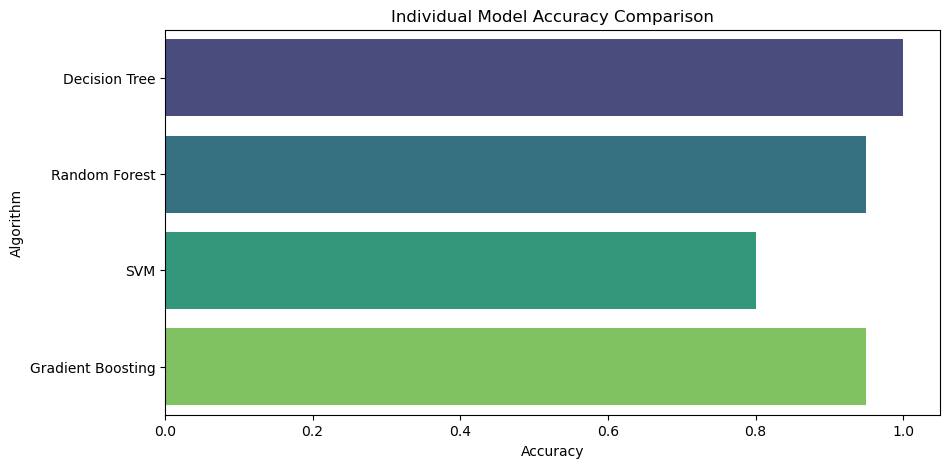

Decision Tree: 1.0000
Random Forest: 0.9500
SVM: 0.8000
Gradient Boosting: 0.9500
Decision Tree: 1.0000
Random Forest: 0.9500
SVM: 0.8000
Gradient Boosting: 0.9500


In [ ]:
# Compare individual model performances
import seaborn as sns
plt.figure(figsize=[10,5], dpi=100)
plt.title('Individual Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model_names, palette='viridis')
plt.show()

# Print individual accuracies
for model, accuracy in zip(model_names, acc):
    print(f"{model}: {accuracy:.4f}")

# Stacking Ensemble Model
Now we'll combine all models using stacking to improve performance.

Stacking Classifier Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



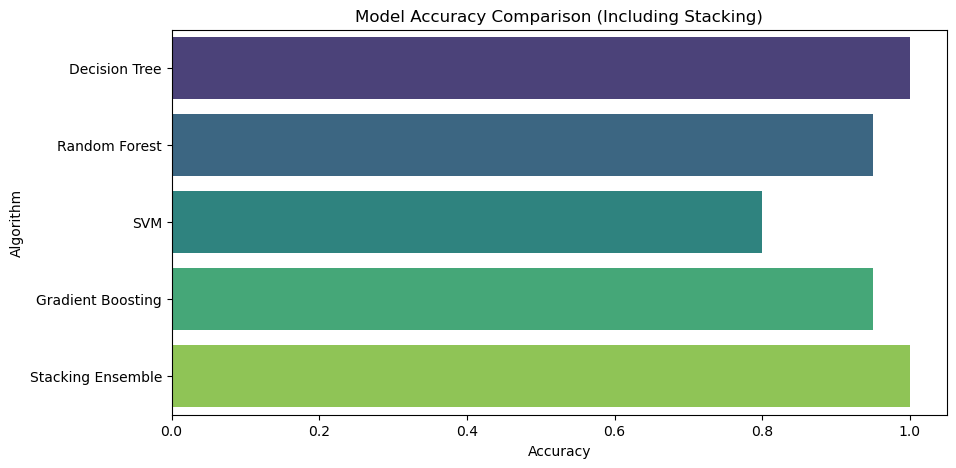

In [ ]:
# Import required models for stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models for stacking
base_models = [
    ('rf', RF),  # Previously trained Random Forest
    ('gb', GB),  # Previously trained Gradient Boosting
    ('dt', DT),  # Previously trained Decision Tree
    ('svm', SVM) # Previously trained SVM
]

# Create and train the stacking model
stack = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

# Fit stacking classifier
stack.fit(X_train, y_train)

# Make predictions
stack_pred = stack.predict(X_test)

# Print results
print("Stacking Classifier Accuracy:", metrics.accuracy_score(y_test, stack_pred))
print("\nClassification Report:")
print(classification_report(y_test, stack_pred, target_names=le_fertilizer.classes_))

# Add stacking results to comparison
acc.append(metrics.accuracy_score(y_test, stack_pred))
model_names.append('Stacking Ensemble')

# Final comparison including stacking
plt.figure(figsize=[10,5], dpi=100)
plt.title('Model Accuracy Comparison (Including Stacking)')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model_names, palette='viridis')
plt.show()

In [ ]:
# Save the complete model with all encoders for easy loading
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the complete stacked model with all necessary components
stack_pkl_filename = '../models/Fertilizer_StackedModel.pkl'
model_data = {
    'stacked_model': stack,
    'le_soil': le_soil,
    'le_crop': le_crop,
    'le_fertilizer': le_fertilizer,
    'feature_names': ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 
                     'Nitrogen', 'Potassium', 'Phosphorous'],
    'soil_types': list(le_soil.classes_),
    'crop_types': list(le_crop.classes_),
    'fertilizer_types': list(le_fertilizer.classes_)
}

with open(stack_pkl_filename, 'wb') as f:
    pickle.dump(model_data, f)

print(f"✅ Stacked model saved successfully to: {stack_pkl_filename}")

In [12]:
# Function to load the saved model and make predictions
def load_and_predict():
    import pickle
    import numpy as np
    
    # Load the saved model
    model_path = '../models/Fertilizer-Recommendation/Fertilizer_StackedModel.pkl'
    
    try:
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        
        stacked_model = model_data['stacked_model']
        le_soil = model_data['le_soil']
        le_crop = model_data['le_crop']
        le_fertilizer = model_data['le_fertilizer']
        
        print("✅ Model loaded successfully!")
        print(f"Available soil types: {model_data['soil_types']}")
        print(f"Available crop types: {model_data['crop_types']}")
        print(f"Available fertilizers: {model_data['fertilizer_types']}")
        
        # Example prediction function
        def predict_fertilizer(temp, humidity, moisture, soil, crop, n, k, p):
            try:
                # Encode inputs
                soil_encoded = le_soil.transform([soil])[0]
                crop_encoded = le_crop.transform([crop])[0]
                
                # Create feature array
                features = np.array([[temp, humidity, moisture, soil_encoded, 
                                    crop_encoded, n, k, p]])
                
                # Make prediction
                prediction = stacked_model.predict(features)[0]
                probabilities = stacked_model.predict_proba(features)[0]
                
                # Get fertilizer name
                fertilizer_name = le_fertilizer.inverse_transform([prediction])[0]
                confidence = np.max(probabilities)
                
                # Get top 3 recommendations
                top_3_idx = np.argsort(probabilities)[-3:][::-1]
                top_3_fertilizers = [(le_fertilizer.inverse_transform([idx])[0], 
                                    probabilities[idx]) for idx in top_3_idx]
                
                return {
                    'fertilizer': fertilizer_name,
                    'confidence': confidence,
                    'top_3': top_3_fertilizers
                }
                
            except Exception as e:
                return {'error': str(e)}
        
        # Test with sample data
        result = predict_fertilizer(25, 65, 50, 'Loamy', 'Wheat', 30, 25, 35)
        print(f"\nSample prediction: {result}")
        
        return predict_fertilizer
        
    except FileNotFoundError:
        print(f"❌ Model file not found: {model_path}")
        return None
    except Exception as e:
        print(f"❌ Error loading model: {str(e)}")
        return None

# Load and test the model
predictor = load_and_predict()

❌ Model file not found: ../models/Fertilizer_StackedModel.pkl


In [ ]:
# Simple Inference Function
def predict_fertilizer_simple(temperature, humidity, moisture, soil_type, crop_type, 
                            nitrogen, potassium, phosphorous):
    """Simple function to predict fertilizer using the trained stacked model"""
    try:
        # Encode categorical inputs
        soil_encoded = le_soil.transform([soil_type])[0]
        crop_encoded = le_crop.transform([crop_type])[0]
        
        # Create input array
        input_data = np.array([[temperature, humidity, moisture, 
                               soil_encoded, crop_encoded,
                               nitrogen, potassium, phosphorous]])
        
        # Make prediction
        prediction = stack.predict(input_data)
        probabilities = stack.predict_proba(input_data)
        
        # Get fertilizer name and confidence
        fertilizer_name = le_fertilizer.inverse_transform(prediction)[0]
        confidence = np.max(probabilities[0])
        
        return fertilizer_name, confidence
        
    except Exception as e:
        return f"Error: {str(e)}", 0.0

# Example usage
print("Available soil types:", list(le_soil.classes_))
print("Available crop types:", list(le_crop.classes_))

# Test prediction
result, confidence = predict_fertilizer_simple(25, 65, 50, 'Loamy', 'Wheat', 30, 25, 35)
print(f"\nPrediction: {result} (Confidence: {confidence:.2%})")